In [94]:
import numpy as np
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
D = 10000
N = 1000
thresh = np.round(np.arange(0,0.500001,0.05)*D)

In [10]:
def bipolarize(X):
    X[X > 0] = 1.0
    X[X < 0] = -1.0
    X[X == 0] = np.random.choice([-1.0, 1.0], size=len(X[X == 0]))
    return X

In [122]:
t = 3000
N = 100
X = np.random.choice([-1.0, 1.0], size=D).reshape(1,-1)
centroids = bipolarize(np.sum(X,axis=0)).reshape(1,-1)
while X.shape[0] < N:
    new = np.copy(centroids[-1]).reshape(1,-1)
    idx = np.random.permutation(D)[:t]
    new[0,idx] = -new[0,idx]
    
    X = np.concatenate((X,new))
    
    newCentroid = bipolarize(np.sum(X,axis=0)).reshape(1,-1)
    centroids = np.concatenate((centroids,newCentroid))

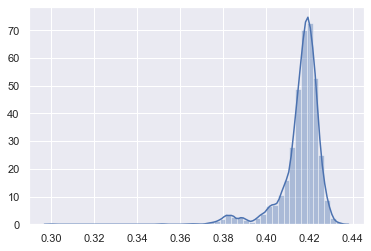

In [123]:
Xdist = pdist(X,metric='hamming')
sns.set()
sns.distplot(Xdist)
plt.show()

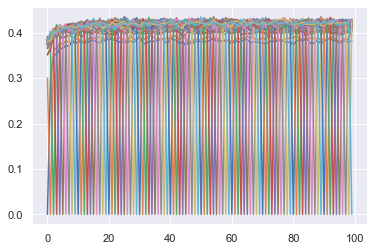

In [128]:
Xdist = pairwise_distances(X,metric='hamming')
sns.set()
plt.plot(Xdist)
plt.show()

In [65]:
centroids.shape

(15, 10000)